# Importing relevant libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as sm
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# Reading our dataset

In [56]:
data=pd.read_excel('DATA.xlsx',header=2)

In [57]:
data.head()

,Unnamed: 0,COVER TYPE,PRODUCT TYPE,VEHICLE USE,MAKE,POLICY STATUS,PREMIUM PAID,TOTAL CLAIMS PAID ON POLICY
0,NaN,MOTOR COMPREHENSIVE,MOTORCYCLES,PRIVATE,NaN,0,3973.60,0.00
1,NaN,MOTOR COMPREHENSIVE,MOTOR OWN GOODS,PRIVATE,NaN,0,16663.78,0.00
2,NaN,MOTOR COMPREHENSIVE,MOTOR PRIVATE CORPORATE,PRIVATE,NISSAN SUNNY,0,479527.55,28141.72
3,NaN,MOTOR COMPREHENSIVE,MOTOR OWN GOODS,PRIVATE,NaN,0,63460.28,0.00
4,NaN,MOTOR COMPREHENSIVE,MOTOR PRIVATE CORPORATE,PRIVATE,NaN,0,894.99,0.00


# Preliminary Data Cleaning

Dropping unnecessary columns

In [58]:
data.columns

Index(['Unnamed: 0', 'COVER TYPE', 'PRODUCT TYPE', 'VEHICLE USE', 'MAKE',
       'POLICY STATUS', 'PREMIUM PAID', 'TOTAL CLAIMS PAID ON POLICY'],
      dtype='object')

In [59]:
data=data.drop(columns=['Unnamed: 0','POLICY STATUS'])
data.head()

,COVER TYPE,PRODUCT TYPE,VEHICLE USE,MAKE,PREMIUM PAID,TOTAL CLAIMS PAID ON POLICY
0,MOTOR COMPREHENSIVE,MOTORCYCLES,PRIVATE,NaN,3973.60,0.00
1,MOTOR COMPREHENSIVE,MOTOR OWN GOODS,PRIVATE,NaN,16663.78,0.00
2,MOTOR COMPREHENSIVE,MOTOR PRIVATE CORPORATE,PRIVATE,NISSAN SUNNY,479527.55,28141.72
3,MOTOR COMPREHENSIVE,MOTOR OWN GOODS,PRIVATE,NaN,63460.28,0.00
4,MOTOR COMPREHENSIVE,MOTOR PRIVATE CORPORATE,PRIVATE,NaN,894.99,0.00


Number of unique value from all object datatype

In [60]:
data.select_dtypes(include='object').nunique()

COVER TYPE        2
PRODUCT TYPE     16
VEHICLE USE       2
MAKE            905
dtype: int64

Shape of the dataset

In [61]:
data.shape

(36654, 6)

In [62]:
#We have 6 columns and 36654 

# Dealing with Missing Values

In [63]:
#Check the amount of missing value
missing=data.isnull().sum()*100/data.shape[0]
missing

COVER TYPE                     0.00
PRODUCT TYPE                   0.00
VEHICLE USE                    0.00
MAKE                          94.93
PREMIUM PAID                   0.00
TOTAL CLAIMS PAID ON POLICY    0.00
dtype: float64

Comment\
About 95% of the values in MAKE are missing\
So we simply drop that feature since we don't have enough information to ascertain anything useful


In [64]:
# Drop MAKE
data=data.drop(columns='MAKE')

In [65]:
data.head()

,COVER TYPE,PRODUCT TYPE,VEHICLE USE,PREMIUM PAID,TOTAL CLAIMS PAID ON POLICY
0,MOTOR COMPREHENSIVE,MOTORCYCLES,PRIVATE,3973.60,0.00
1,MOTOR COMPREHENSIVE,MOTOR OWN GOODS,PRIVATE,16663.78,0.00
2,MOTOR COMPREHENSIVE,MOTOR PRIVATE CORPORATE,PRIVATE,479527.55,28141.72
3,MOTOR COMPREHENSIVE,MOTOR OWN GOODS,PRIVATE,63460.28,0.00
4,MOTOR COMPREHENSIVE,MOTOR PRIVATE CORPORATE,PRIVATE,894.99,0.00


# Exploratory Data Analysis

Categorical Feature

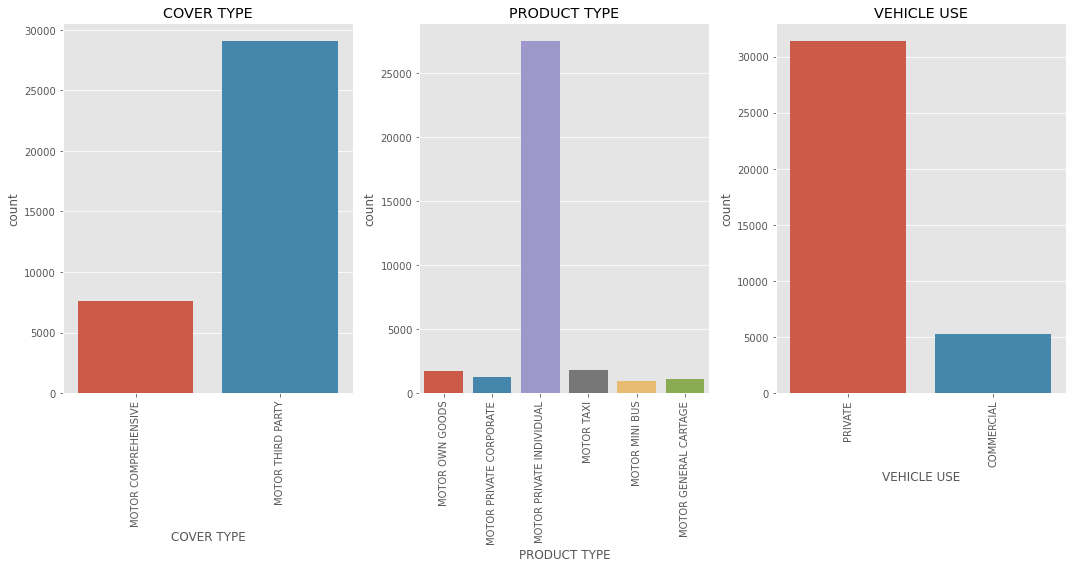

In [66]:
#Get names of all categorical feature

cat=data.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots

num_cols=len(cat)
num_rows=(num_cols+2)//3
fig,axes=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,8*num_rows))
axes=axes.flatten()

# Create a countplot for the top 6  values 
for i, var in enumerate(cat):
    top_values=data[var].value_counts().nlargest(6).index
    filtered_data=data[data[var].isin(top_values)]
    sns.countplot(x=var,data=filtered_data,ax=axes[i])
    axes[i].set_title(var)
    axes[i].tick_params(axis='x',rotation=90)
    
# Remove any extra empty subplots if needed
if num_cols < len(axes):
    for i in range(num_cols,len(axes)):
        fig.delaxes(axes[i])
        
# Adjust spacing  between subplots
fig.tight_layout()

# Show plot
plt.show()

Comment\
With COVER TYPE, we can see that most of insurance made were that\
of the Motor third party

Almost all the cars insured were vehicles for Private use and because of this,\
Motor Private Individual was the most out of the various product types

So the probability of  Private vehicles is higher as compared to commercial vehicles\
Esmie you can add more 



In [67]:
# Set the desired float formatting
pd.set_option('display.float_format', '{:.2f}'.format)

# describe the data in terms of cover type
data.groupby('COVER TYPE').describe().T

COVER TYPE                         MOTOR COMPREHENSIVE  MOTOR THIRD PARTY
PREMIUM PAID                count              7569.00           29085.00
                            mean               7614.35             408.80
                            std               41764.53            1384.46
                            min              -20195.00           -7273.75
                            25%                1002.00             215.00
                            50%                1957.00             327.00
                            75%                5194.50             402.00
                            max             1890559.28           93053.61
TOTAL CLAIMS PAID ON POLICY count              7569.00           29085.00
                            mean               6444.82             172.96
                            std               50809.61            7773.45
                            min                   0.00               0.00
                            25%                   0.00               0.00
                            50%                   0.00               0.00
                            75%                 571.83               0.00
                            max             1397975.68          772317.07

Comprehensive insurance has higher average premium paid than third party policyholders\
Total claims paid too is higher, on average, for comprehensive than third party

In [68]:
# describe the data in terms of vehicle use
data.groupby('VEHICLE USE').describe().T

VEHICLE USE                        COMMERCIAL    PRIVATE
PREMIUM PAID                count     5263.00   31391.00
                            mean      1315.20    1994.23
                            std       3769.81   20731.60
                            min      -1866.38  -20195.00
                            25%        438.00     225.00
                            50%        503.00     327.00
                            75%        600.00     516.50
                            max      72917.00 1890559.28
TOTAL CLAIMS PAID ON POLICY count     5263.00   31391.00
                            mean       403.78    1646.54
                            std       5105.30   26102.49
                            min          0.00       0.00
                            25%          0.00       0.00
                            50%          0.00       0.00
                            75%          0.00       0.00
                            max     188920.00 1397975.68

Private vehicles pay more premiums and claims, on average, as compared to commercial vehicles.\
The expected probability of a private vehicle policyholder making a claim is 6% while it is 3%\
for commercial policyholders.

MOTOR PRIVATE CORPORATE has the highest average premium paid of 10234.34,\
followed by MOTOR SPECIAL TYPE ON ROAD with 8016.18. For average claims,\
MOTOR PRIVATE CORPORATE tops with 5868.97 followed by MOTOR OWN GOODS of 4317.81.\
MOTOR HIRING has the highest claim probability of 21% followed by MOTOR PRIVATE CORPORATE with 15% and MACHINERY BREAKDOWN and\ MOTOR AMBULANCE AND HEARSE have the least with 0%

Numerical Feature

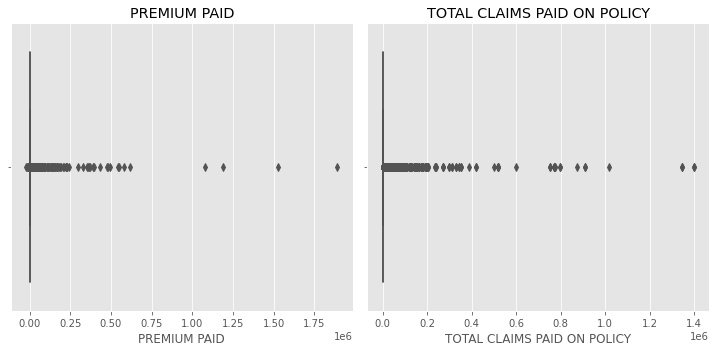

In [69]:
#Get names of all numerical feature

num_vars=data.select_dtypes(include=['int','float']).columns.tolist()
#exclude_vars=['Health status']
#num_vars=[var for var in num_vars if var not in exclude_vars]

# Create a figure with subplots

num_cols=len(num_vars)
num_rows=(num_cols+2)//3
fig,axes=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axes=axes.flatten()

# Create a countplot for the top 6  values 
for i, var in enumerate(num_vars):
    sns.boxplot(x=data[var],ax=axes[i])
    axes[i].set_title(var)
    
# Remove any extra empty subplots if needed
if num_cols < len(axes):
    for i in range(num_cols,len(axes)):
        fig.delaxes(axes[i])
        
# Adjust spacing  between subplots
fig.tight_layout()

# Show plot
#plt.show()
    

Comment\
So Esmie here, you can talk about the outliers and other stuff

# Model Purpose Transformation

Since our project aim is to be able to tell if an individual\
will make a claim or not, we have to categorize 'TOTAL CLAIMS PAID ON POLICY'

In [70]:
data['TOTAL CLAIMS PAID ON POLICY'] = data['TOTAL CLAIMS PAID ON POLICY'].map(lambda val:1 if val!=0 else 0)

In [71]:
data.head()

,COVER TYPE,PRODUCT TYPE,VEHICLE USE,PREMIUM PAID,TOTAL CLAIMS PAID ON POLICY
0,MOTOR COMPREHENSIVE,MOTORCYCLES,PRIVATE,3973.60,0
1,MOTOR COMPREHENSIVE,MOTOR OWN GOODS,PRIVATE,16663.78,0
2,MOTOR COMPREHENSIVE,MOTOR PRIVATE CORPORATE,PRIVATE,479527.55,1
3,MOTOR COMPREHENSIVE,MOTOR OWN GOODS,PRIVATE,63460.28,0
4,MOTOR COMPREHENSIVE,MOTOR PRIVATE CORPORATE,PRIVATE,894.99,0


# Label Encoding

In [72]:
for col in data.select_dtypes(include=['object']).columns:
    print(f'{col}:{data[col].unique()}')

COVER TYPE:['MOTOR COMPREHENSIVE' 'MOTOR THIRD PARTY']
PRODUCT TYPE:['MOTORCYCLES' 'MOTOR OWN GOODS' 'MOTOR PRIVATE CORPORATE'
 'MOTOR PRIVATE INDIVIDUAL' 'MOTOR TRADE PLATE' 'MOTOR TAXI'
 'MOTOR FIRE AND THEFT' 'MOTOR MINI BUS' 'MOTOR GENERAL CARTAGE'
 'MOTOR MAXI BUS' 'MOTOR SPECIAL TYPE ON SITE' 'MOTOR ART AND TANKERS'
 'MOTOR SPECIAL TYPE ON ROAD' 'MOTOR HIRING' 'MOTOR AMBULANCE AND HEARSE'
 'MACHINERY BREAKDOWN']
VEHICLE USE:['PRIVATE' 'COMMERCIAL']


In [73]:
from sklearn import preprocessing
for col in data.select_dtypes(include=['object']).columns:
    
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])
    
    print(f'{col}: {data[col].unique()}')

COVER TYPE: [0 1]
PRODUCT TYPE: [15  8  9 10 14 13  3  7  4  6 12  2 11  5  1  0]
VEHICLE USE: [1 0]


Inspecting our transformed data

In [74]:
data.head()

,COVER TYPE,PRODUCT TYPE,VEHICLE USE,PREMIUM PAID,TOTAL CLAIMS PAID ON POLICY
0,0,15,1,3973.60,0
1,0,8,1,16663.78,0
2,0,9,1,479527.55,1
3,0,8,1,63460.28,0
4,0,9,1,894.99,0


# Correlation

<AxesSubplot:>

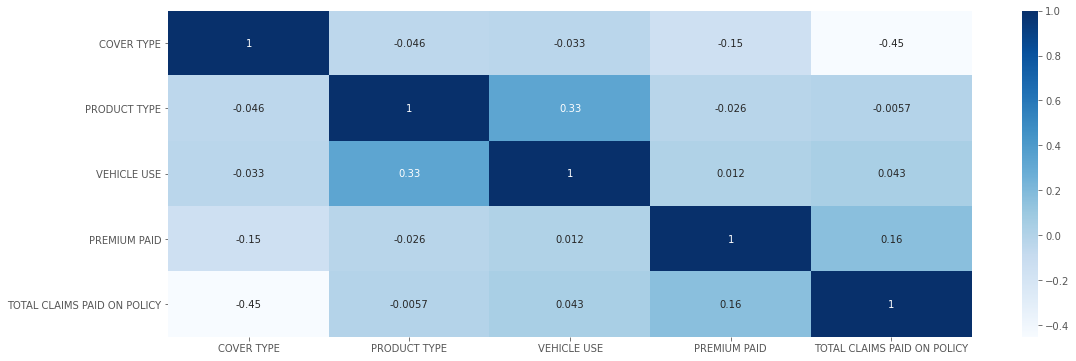

In [75]:
correlation=data.corr()
plt.figure(figsize=(18,6))
sns.heatmap(correlation,annot=True,cmap='Blues')

Comment

Esmie I believe in you hahahaah

<AxesSubplot:xlabel='TOTAL CLAIMS PAID ON POLICY', ylabel='count'>

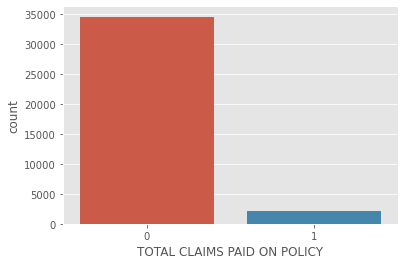

In [76]:
sns.countplot(data['TOTAL CLAIMS PAID ON POLICY'])

# Machine Learning

Balancing the data

In [77]:
# Undersampling
from sklearn.utils import resample
majority = data[data['TOTAL CLAIMS PAID ON POLICY']==0] # Majority class
minority = data[data['TOTAL CLAIMS PAID ON POLICY']==1] # Minority class

# Random selection without replacement
majority_undersampled = resample(majority, replace=False, n_samples=2500, random_state=42) # Randomly selects 2500 records from majority to match minority class size

# New downsampled dataset

data = pd.concat([majority_undersampled,minority])  # Minority class + sample of 38 from majority
data['TOTAL CLAIMS PAID ON POLICY'].value_counts()

0    2500
1    2158
Name: TOTAL CLAIMS PAID ON POLICY, dtype: int64

Splitting our data

In [78]:
from sklearn.model_selection import train_test_split

Declaring our target variable and explanatory variables

In [79]:
X=np.array(data['PREMIUM PAID']).reshape(-1, 1)
X

array([[  450.],
       [ 1835.],
       [  269.],
       ...,
       [ 2757.],
       [19979.],
       [18226.]])

In [80]:
Y=data['TOTAL CLAIMS PAID ON POLICY']
Y

3444     0
29357    0
19003    0
31969    0
25079    0
        ..
36601    1
36634    1
36637    1
36643    1
36650    1
Name: TOTAL CLAIMS PAID ON POLICY, Length: 4658, dtype: int64

# Training Dataset

In [81]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, train_size=0.80, random_state=42 )

Data Balancing

In [82]:
#Y_train.value_counts()

In [83]:
import imblearn

In [84]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 42)

# fit predictor and target variable
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [85]:
Y_train.value_counts()

0    2006
1    2006
Name: TOTAL CLAIMS PAID ON POLICY, dtype: int64

# Logistic Regression

In [86]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

reg=LogisticRegression()
reg.fit(X_train,Y_train)

LogisticRegression()

Tuning

In [87]:
# define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'C': 0.01}


In [88]:
reg=LogisticRegression(C=0.01)

In [89]:
reg.fit(X_train,Y_train)
y_predict=reg.predict(X_test)
#y_predict=reg.predict_proba(X_test)

Model Evaluation

In [90]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       494
           1       0.87      0.57      0.69       438

    accuracy                           0.76       932
   macro avg       0.79      0.75      0.75       932
weighted avg       0.78      0.76      0.75       932



# Random Forest

Tuning

In [91]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [92]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [93]:
Y_predict=model.predict(X_test)
#Y_predict=model.predict_proba(X_test)

Model Evaluation

In [94]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       494
           1       0.83      0.84      0.84       438

    accuracy                           0.84       932
   macro avg       0.84      0.84      0.84       932
weighted avg       0.84      0.84      0.84       932



Confusion Matrix

In [95]:
from sklearn import metrics
#cm=metrics.confusion_matrix(Y_test,Y_predict)

In [96]:
from sklearn.metrics import confusion_matrix
PRED=pd.DataFrame(confusion_matrix(Y_test, Y_predict))
PRED.columns=['Predicted 0 (No claim)','Predicted 1(Claim)']
PRED=PRED.rename(index={0:'Actual 0 (No claim)',1:'Actual 1(Claim) '})
PRED

,Predicted 0 (No claim),Predicted 1(Claim)
Actual 0 (No claim),417,77
Actual 1(Claim),68,370


# XGBoost

In [97]:
import xgboost as xgb
from xgboost import XGBClassifier

learn = XGBClassifier()
learn.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [98]:
pre = learn.predict(X_test)
#pre = learn.predict_proba(X_test)
sci_pred = [round(value) for value in pre]


Model Evaluation

In [99]:
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       494
           1       0.83      0.93      0.88       438

    accuracy                           0.88       932
   macro avg       0.88      0.88      0.88       932
weighted avg       0.88      0.88      0.88       932



Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix
PRE=pd.DataFrame(confusion_matrix(Y_test, pre))
PRE.columns=['Predicted 0 (No claim)','Predicted 1(Claim)']
PRE=PRE.rename(index={0:'Actual 0 (No claim)',1:'Actual 1(Claim) '})
PRE

,Predicted 0 (No claim),Predicted 1(Claim)
Actual 0 (No claim),408,86
Actual 1(Claim),29,409


# SHAP

SHAP for Random Forest

In [101]:
import shap

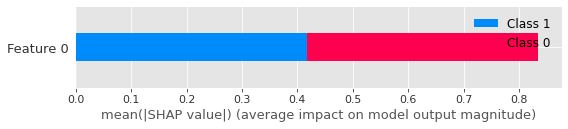

In [102]:
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

SHAP for XGBoost

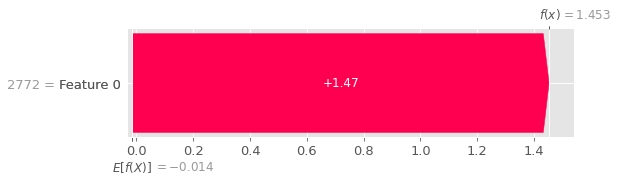

In [103]:
# explain the model's predictions using SHAP
explainer=shap.TreeExplainer(learn)
shap_values=explainer(X_test)

shap.plots.waterfall(shap_values[0])

# Saving our ML(XGBoost) model using Pickle

In [104]:
import pickle

In [105]:
model_file="Claim_Classifier_model2.pkl" 

In [106]:
with open(model_file, 'wb') as file:  
    pickle.dump(learn, file)

# Testing our saved model

In [107]:
 #load saved model
with open('Claim_Classifier_model2.pkl' , 'rb') as f:
    lr = pickle.load(f)


In [108]:
Premium_Paid=eval(input('Enter the amount of premium paid: '))

Enter the amount of premium paid: 400000


In [109]:
# check prediction
Claim=lr.predict([[Premium_Paid]])

In [110]:
for i in Claim:
    if i==0:
        print('The probability of this individual making a claim is low')
    if i==1:
        print('The probability of this individual making a claim is high')

The probability of this individual making a claim is high
